In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit
sns.set(font="Serif",font_scale=1.2)

In [2]:
rv_data = pd.read_csv('Data/smc-obs40434-2857_fxcor_results.dat',delimiter="\s+")

In [3]:
rv_data

,hjd_ref,hjd_obs,hjd_diff,spec_line,vrel,verr,tdr
0,2.458867e+06,2.458867e+06,0.00000,HeII_5411,-0.0001,0.000,6.058E7
1,2.458867e+06,2.458867e+06,0.00000,HeII_4686,-0.0000,0.000,5.179E7
2,2.458867e+06,2.458867e+06,0.00000,HeII_4542,-0.0001,0.000,4.526E7
3,2.458867e+06,2.458867e+06,0.00000,HeII_4201,-0.0002,0.000,4.310E7
4,2.458867e+06,2.458867e+06,0.00000,HeII_4026,-0.0000,0.000,1.547E8
...,...,...,...,...,...,...,...
63,2.458867e+06,2.458839e+06,-28.00119,HeIIH_blend,58.1072,10.615,44.83
64,2.458867e+06,2.458839e+06,-28.00119,HeIIH_blend_lite,57.6163,9.650,49.90
65,2.458867e+06,2.458839e+06,-28.00119,All_lines,68.9178,15.805,41.28
66,2.458867e+06,2.458839e+06,-28.00119,All_lines_lite,73.2606,12.713,49.15


In [4]:
np.unique(rv_data['spec_line'])

array(['All_lines', 'All_lines_lite', 'Full', 'HeII3835/Hg',
       'HeII3889/Hf', 'HeII3969/He', 'HeII4101/Hd', 'HeII4339/Hc',
       'HeII4860/Hb', 'HeIIH_blend', 'HeIIH_blend_lite', 'HeII_4026',
       'HeII_4201', 'HeII_4542', 'HeII_4686', 'HeII_5411', 'HeII_iso'],
      dtype=object)

In [5]:
class fit_spec:
    
    
    def __init__(self,spec_line_string):
    
        # Pick Line
        line = rv_data[rv_data['spec_line'] == spec_line_string]
        
        # Drop If 'INDEF'
        line = line[line['verr'] != 'INDEF']

        # Drop If 0 Error
        line = line[line['verr'].astype(float) != 0]
        
        # Rest Index
        line = line.reset_index(drop=True)
        
        # Get Data
        self.mjd = [float(l) for l in line['hjd_obs']]
        self.mjd = self.mjd - np.min(self.mjd) + 1
        self.vrel = [float(l) for l in line['vrel']]
        self.verr = [float(l) for l in line['verr']]

        # Fit Line
        popt, pcov = curve_fit(self.f, self.mjd,self.vrel)

        # Get range of mjds to fit over
        self.date_range = np.linspace(np.min(self.mjd)-1,np.max(self.mjd)+1,400)

        # Get Curve
        self.vel = self.f(self.date_range,popt[0],popt[1],popt[2])
        
    
    # Curve to fit to
    def f(self,x,a,b,c):
        return a * np.sin(b * x) + c
    

In [6]:
HeII_iso = fit_spec('HeIIH_blend')

plt.figure(figsize=(10,10))
plt.errorbar(HeII_iso.mjd,HeII_iso.vrel,yerr = HeII_iso.verr,ls="none",marker="o")
plt.plot(HeII_iso.date_range,HeII_iso.vel)


TypeError: Improper input: N=3 must not exceed M=2

/home/bethany/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


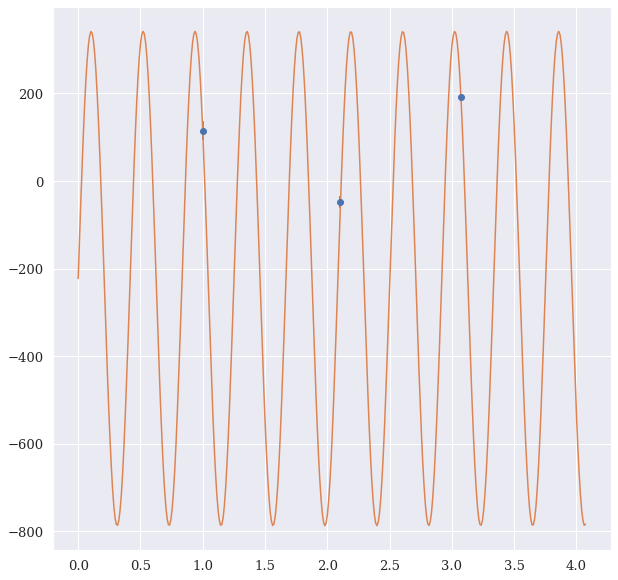

In [7]:
HeII_iso = fit_spec('HeII_iso')

plt.figure(figsize=(10,10))
plt.errorbar(HeII_iso.mjd,HeII_iso.vrel,yerr = HeII_iso.verr,ls="none",marker="o")
plt.plot(HeII_iso.date_range,HeII_iso.vel)

In [8]:
HeII_iso = fit_spec('HeII_4026')

plt.figure(figsize=(10,10))
plt.errorbar(HeII_iso.mjd,HeII_iso.vrel,yerr = HeII_iso.verr,ls="none",marker="o")
plt.plot(HeII_iso.date_range,HeII_iso.vel)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.